# Polynomial Regression with Regularization: Growth Data
Import libraries and generate synthetic data.

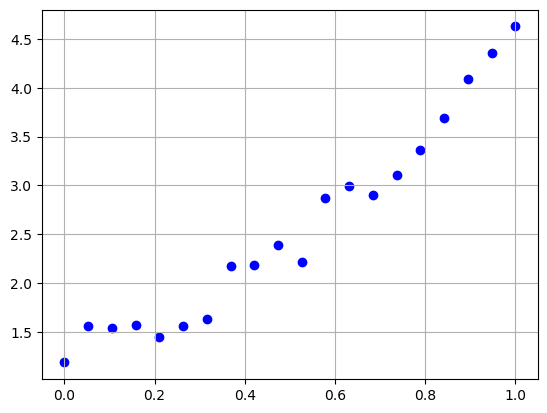

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Generate the Growth Data Set
np.random.seed(42)
x = np.linspace(0,1,20).reshape(-1,1)
y = np.exp(1.5*x) + 0.5*np.random.rand(x.size,1)

plt.scatter(x,y,color='b')
plt.grid()
plt.show()

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=10)),
                ('linearregression', LinearRegression())])
Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=10)),
                ('ridge', Ridge(alpha=0.05))])


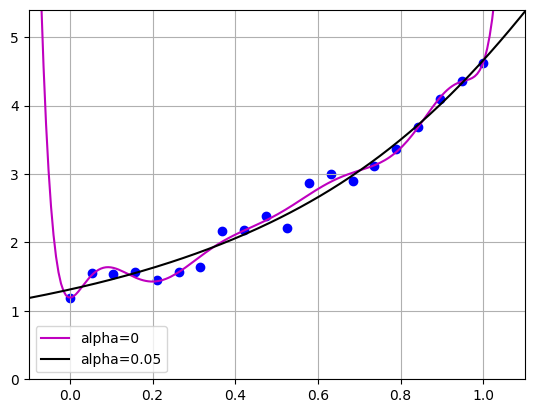

POLYNOMIAL REGRESSION w/o Regularization
Coefficients: 
 [1.1929456] [[ 0.00000000e+00 -5.88602623e-02  3.07631940e+02 -5.15644397e+03
   3.65080913e+04 -1.40471072e+05  3.22960696e+05 -4.56688715e+05
   3.89509355e+05 -1.83836241e+05  3.68701923e+04]]
R2 score: 0.98995

POLYNOMIAL REGRESSION with Regularization
Coefficients: 
 [1.31193193] [[ 0.          1.34902868  1.01591599  0.57698839  0.2819489   0.1239013
   0.04791948  0.01263199 -0.00581344 -0.01958624 -0.03422319]]
R2 score: 0.97919


In [2]:
# Form a pipline, then fit using Polynomial Regression
model1 = make_pipeline(PolynomialFeatures(degree=10),
                       LinearRegression()).fit(x,y)
model2 = make_pipeline(PolynomialFeatures(degree=10),
                       Ridge(alpha=0.05)).fit(x,y)
print(model1)
print(model2)

# Plot the best-fit polynomials
x_fine = np.linspace(-0.1,1.1,200).reshape(-1,1)
y_pred1 = model1.predict(x_fine)  # Polynomial Regression, no regularization
y_pred2 = model2.predict(x_fine)  # Polynomial Regression, with regularization

plt.scatter(x,y,color='b')
plt.plot(x_fine,y_pred1,color='m',label='alpha=0')
plt.plot(x_fine,y_pred2,color='k',label='alpha=0.05')
plt.axis([-0.1, 1.1, 0, 5.4])
plt.legend()
plt.grid()
plt.show()

# Report the polynomial coefficients and accuracy
print('POLYNOMIAL REGRESSION w/o Regularization')
print("Coefficients: \n", model1.steps[1][1].intercept_, model1.steps[1][1].coef_)
print('R2 score: %.5f' % model1.score(x,y))
print('\nPOLYNOMIAL REGRESSION with Regularization')
print("Coefficients: \n", model2.steps[1][1].intercept_, model2.steps[1][1].coef_)
print('R2 score: %.5f' % model2.score(x,y))    